In [1]:
import os
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from patsy import dmatrices
import statsmodels.api as sm
import sklearn.model_selection as model_selection 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector
from sklearn.naive_bayes import ComplementNB 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.base import TransformerMixin
from sklearn import svm
from sklearn import tree

In [2]:
df = pd.read_csv("C:/Users/Franklin/Documents/PROGRAMA_DATASCIENCE/Modulo 10_ Machine Learning I/Data/bank-additional-full.csv",
                        sep=";")

In [3]:
model = LogisticRegression(max_iter=500, penalty='none')

In [4]:
model

LogisticRegression(max_iter=500, penalty='none')

In [5]:
x = df.drop('y', axis = 'columns')
y = df['y']

In [6]:
categorical_columns = ['job','marital','education',
                       'default','loan','housing','contact',
                       'month', 'day_of_week', 'poutcome']

numerical_columns = ['age','previous','cons.price.idx',
                     'cons.conf.idx','euribor3m']

In [7]:
prep = ColumnTransformer([('encoder', OneHotEncoder(sparse=False), categorical_columns), #dummy all nominal
                          ('scaler',StandardScaler(), numerical_columns)], #standarize all numerical
                         remainder="drop"
)

In [8]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as Pipeline_imb
from imblearn.under_sampling import EditedNearestNeighbours

In [9]:
ros = RandomOverSampler(random_state=0)

In [10]:
x_resampled, y_resampled = ros.fit_resample(x, y)

In [11]:
df_prep_bal = prep.fit_transform(x_resampled)

In [12]:
columns_prep = []
for word in prep.get_feature_names_out():
    if 'encoder_' in word:
        columns_prep.append(word.replace('encoder__', ''))
    if 'scaler_' in word:
        columns_prep.append(word.replace('scaler__', ''))    


In [13]:
x_bal = pd.DataFrame(df_prep_bal, columns=columns_prep)

In [14]:
x_train_bal, x_test_bal, y_train_bal, y_test_bal = model_selection.train_test_split(x_bal,y_resampled, test_size=0.2,
                                                    random_state=123,stratify= y_resampled)

In [17]:
scores = cross_val_score(model,x_train_bal, y_train_bal, cv=5, scoring='accuracy')

In [18]:
scores

array([0.74016758, 0.73347584, 0.73595554, 0.73407439, 0.74117144])

In [19]:
scores.mean()

0.7369689582286677

In [20]:
y_train_bal.shape

(58476,)

In [22]:
model.fit(x_train_bal, y_train_bal)

LogisticRegression(max_iter=500, penalty='none')

In [23]:
metrics.accuracy_score(y_train_bal, model.predict(x_train_bal))

0.7375333470141596

In [25]:
confusion_matrix(y_train_bal, model.predict(x_train_bal))

array([[24568,  4670],
       [10678, 18560]], dtype=int64)

In [27]:
confusion_matrix(y_test_bal, model.predict(x_test_bal))

array([[6132, 1178],
       [2673, 4637]], dtype=int64)

In [29]:
print( classification_report(y_train_bal, model.predict(x_train_bal)) )

              precision    recall  f1-score   support

          no       0.70      0.84      0.76     29238
         yes       0.80      0.63      0.71     29238

    accuracy                           0.74     58476
   macro avg       0.75      0.74      0.73     58476
weighted avg       0.75      0.74      0.73     58476



In [30]:
print( classification_report(y_test_bal, model.predict(x_test_bal)) )

              precision    recall  f1-score   support

          no       0.70      0.84      0.76      7310
         yes       0.80      0.63      0.71      7310

    accuracy                           0.74     14620
   macro avg       0.75      0.74      0.73     14620
weighted avg       0.75      0.74      0.73     14620



# Elastic Net 

In [31]:
model2 = LogisticRegression(penalty= 'elasticnet', solver= 'saga', 
                                                    max_iter=500)

In [32]:
model2

LogisticRegression(max_iter=500, penalty='elasticnet', solver='saga')

In [39]:
model2.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'elasticnet',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [53]:
parameters = {
    'C' : [1e-9, 1e-5, 1e-1],
    'l1_ratio': [0.1, 0.5, 0.9]
}

In [54]:
model_tuned = GridSearchCV(model2, parameters, cv=5, n_jobs=-1)
fit_obj = model_tuned.fit(x_train_bal, y_train_bal)
print(fit_obj.cv_results_['mean_test_score'])

[0.5        0.4999658  0.5000171  0.71670431 0.5000171  0.4999829
 0.73719127 0.73736228 0.73717417]


In [108]:
model_tuned.summary()

AttributeError: 'GridSearchCV' object has no attribute 'summary'

In [106]:
fit_obj.cv_results_

{'mean_fit_time': array([0.23641562, 0.24904661, 0.24798164, 1.57935152, 0.29753923,
        0.27584729, 5.56098385, 6.04167652, 7.42616997]),
 'std_fit_time': array([0.00787067, 0.01755748, 0.01476386, 0.23975145, 0.08921275,
        0.01665846, 0.44508858, 0.25187603, 1.82341876]),
 'mean_score_time': array([0.03826275, 0.03397512, 0.03714504, 0.03971519, 0.04247146,
        0.0402915 , 0.03712187, 0.03872299, 0.02384701]),
 'std_score_time': array([0.00789976, 0.00436645, 0.00915128, 0.00527841, 0.00982059,
        0.00499328, 0.00848825, 0.00658649, 0.00745378]),
 'param_C': masked_array(data=[1e-09, 1e-09, 1e-09, 1e-05, 1e-05, 1e-05, 0.1, 0.1,
                    0.1],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_l1_ratio': masked_array(data=[0.1, 0.5, 0.9, 0.1, 0.5, 0.9, 0.1, 0.5, 0.9],
              mask=[False, False, False, False, False, False, False, False,
 

In [55]:
model_tuned

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': [1e-09, 1e-05, 0.1], 'l1_ratio': [0.1, 0.5, 0.9]})

In [56]:
best_model_bal = fit_obj.best_estimator_
best_model_bal

LogisticRegression(C=0.1, l1_ratio=0.5, max_iter=500, penalty='elasticnet',
                   solver='saga')

In [57]:
model_tuned.fit(x_train_bal, y_train_bal)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': [1e-09, 1e-05, 0.1], 'l1_ratio': [0.1, 0.5, 0.9]})

In [110]:
print(model_tuned.fit(x_train_bal, y_train_bal))

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': [1e-09, 1e-05, 0.1], 'l1_ratio': [0.1, 0.5, 0.9]})


In [59]:
metrics.accuracy_score(y_train_bal, model_tuned.predict(x_train_bal))

0.7378069635405978

In [61]:
print( classification_report(y_train_bal, model_tuned.predict(x_train_bal)) )

              precision    recall  f1-score   support

          no       0.70      0.84      0.76     29238
         yes       0.80      0.64      0.71     29238

    accuracy                           0.74     58476
   macro avg       0.75      0.74      0.74     58476
weighted avg       0.75      0.74      0.74     58476



In [62]:
print( classification_report(y_test_bal, model_tuned.predict(x_test_bal)) )

              precision    recall  f1-score   support

          no       0.70      0.84      0.76      7310
         yes       0.80      0.63      0.71      7310

    accuracy                           0.74     14620
   macro avg       0.75      0.74      0.73     14620
weighted avg       0.75      0.74      0.73     14620



In [83]:
#define metrics
y_pred_proba = np.max(model_tuned.predict_proba(x_test_bal), axis=1)
y_pred_proba


array([0.52137351, 0.80520987, 0.77611585, ..., 0.72010473, 0.68443722,
       0.86788622])

In [77]:
y_test_bal_L = []

for i in y_test_bal:
    if i=='yes':
        y_test_bal_L.append(1)
    else:
        y_test_bal_L.append(0)


In [89]:
metrics.roc_curve(y_test_bal_L,y_pred_proba)

(array([0.       , 0.       , 0.       , ..., 0.9995896, 0.9995896,
        1.       ]),
 array([0.00000000e+00, 4.10396717e-04, 1.09439124e-03, ...,
        9.99726402e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99288772, 0.99288772, 0.9923149 , ..., 0.50019735, 0.50014432,
        0.50000839]))

C:\Users\Franklin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


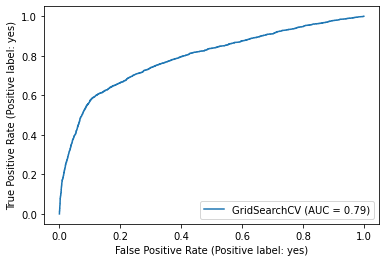

In [92]:
metrics.plot_roc_curve(model_tuned, x_test_bal, y_test_bal)
plt.show()

In [117]:
model_tuned.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 500,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'elasticnet',
 'estimator__random_state': None,
 'estimator__solver': 'saga',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(max_iter=500, penalty='elasticnet', solver='saga'),
 'n_jobs': -1,
 'param_grid': {'C': [1e-09, 1e-05, 0.1], 'l1_ratio': [0.1, 0.5, 0.9]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [120]:
type(model_tuned)

sklearn.model_selection._search.GridSearchCV

In [122]:
model_tuned.best_estimator_.coef_

array([[ 0.00755458, -0.08377826,  0.06404303, -0.04812106,  0.02218168,
         0.40898287, -0.00233771, -0.05113445,  0.42457676,  0.        ,
        -0.04418513,  0.        , -0.09872063, -0.06389854,  0.        ,
         0.23987042, -0.06622898,  0.10367802,  0.        , -0.0197888 ,
         0.        ,  0.        ,  0.11219662,  0.05262941,  0.15424475,
        -0.00960551,  0.        ,  0.0276413 , -0.01771146,  0.        ,
         0.05528492, -0.01771146,  0.        ,  0.20044697, -0.20502593,
         0.        , -0.15241727,  0.27756554,  0.17240882, -0.01331538,
         1.1323159 , -0.66210045, -0.11948586,  0.60621634, -0.20354431,
         0.018486  , -0.15943581,  0.        , -0.02247895,  0.10748381,
        -0.56297751,  0.        ,  1.15066573, -0.01925374,  0.09052047,
         0.2904255 ,  0.26878384, -1.03389077]])

In [124]:
model_tuned.best_estimator_.intercept_

array([-0.04850103])

In [128]:
model_tuned.best_estimator_.

58

In [132]:
print(model_tuned.best_estimator_.named_steps.model_tuned.coef_)

AttributeError: 'LogisticRegression' object has no attribute 'named_steps'

In [136]:
model_tuned.best_estimator_.coef_

array([[ 0.00755458, -0.08377826,  0.06404303, -0.04812106,  0.02218168,
         0.40898287, -0.00233771, -0.05113445,  0.42457676,  0.        ,
        -0.04418513,  0.        , -0.09872063, -0.06389854,  0.        ,
         0.23987042, -0.06622898,  0.10367802,  0.        , -0.0197888 ,
         0.        ,  0.        ,  0.11219662,  0.05262941,  0.15424475,
        -0.00960551,  0.        ,  0.0276413 , -0.01771146,  0.        ,
         0.05528492, -0.01771146,  0.        ,  0.20044697, -0.20502593,
         0.        , -0.15241727,  0.27756554,  0.17240882, -0.01331538,
         1.1323159 , -0.66210045, -0.11948586,  0.60621634, -0.20354431,
         0.018486  , -0.15943581,  0.        , -0.02247895,  0.10748381,
        -0.56297751,  0.        ,  1.15066573, -0.01925374,  0.09052047,
         0.2904255 ,  0.26878384, -1.03389077]])

In [139]:
model_tuned.best_estimator_.feature_names_in_

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'housing_no', 'housing_unknown', 'housing_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'pout

In [171]:
print ("{:<40} {:<60}".format('Variable', 'Coeficiente'))
print ("{:<40} {:<60}".format('Intercepto',model_tuned.best_estimator_.intercept_[0] ))
for i in range(len(model_tuned.best_estimator_.feature_names_in_)):
    if model_tuned.best_estimator_.coef_[0][i] >0:
        print ("{:<40} {:<60}".format(model_tuned.best_estimator_.feature_names_in_[i],model_tuned.best_estimator_.coef_[0][i] ))

Variable                                 Coeficiente                                                 
Intercepto                               -0.04850102902297045                                        
job_admin.                               0.007554576189431457                                        
job_entrepreneur                         0.06404303071784419                                         
job_management                           0.022181675246916333                                        
job_retired                              0.408982867498445                                           
job_student                              0.4245767555890961                                          
marital_unknown                          0.23987042190973018                                         
education_basic.6y                       0.10367801784581847                                         
education_university.degree              0.11219662288211317                      

In [154]:
len(model_tuned.best_estimator_.coef_[0])

58

In [153]:
model_tuned.best_estimator_.coef_[0]

array([ 0.00755458, -0.08377826,  0.06404303, -0.04812106,  0.02218168,
        0.40898287, -0.00233771, -0.05113445,  0.42457676,  0.        ,
       -0.04418513,  0.        , -0.09872063, -0.06389854,  0.        ,
        0.23987042, -0.06622898,  0.10367802,  0.        , -0.0197888 ,
        0.        ,  0.        ,  0.11219662,  0.05262941,  0.15424475,
       -0.00960551,  0.        ,  0.0276413 , -0.01771146,  0.        ,
        0.05528492, -0.01771146,  0.        ,  0.20044697, -0.20502593,
        0.        , -0.15241727,  0.27756554,  0.17240882, -0.01331538,
        1.1323159 , -0.66210045, -0.11948586,  0.60621634, -0.20354431,
        0.018486  , -0.15943581,  0.        , -0.02247895,  0.10748381,
       -0.56297751,  0.        ,  1.15066573, -0.01925374,  0.09052047,
        0.2904255 ,  0.26878384, -1.03389077])